In [19]:
import numpy as np
from numpy.linalg import svd
from itertools import product
import matplotlib.pyplot as plt

# Rank-3 TensorNetwork

def TRG_3_rank(K, beta , D, Dcut, no_iter):
    T = np.empty([D, D, D])

    inds = np.arange(D)

    for i, j, k in product(inds, repeat=3):
        T[i][j][k] = 0.5*(1 + (2*i - 1)*(2*j - 1)*(2*k - 1)) * \
            np.exp(beta*K*(i+j+k - 2))
            
    for n in range(no_iter):
        D_new = min(D**2, Dcut)
        inds = np.arange(D)
        inds_new = np.arange(D_new)

        M = np.zeros(shape=(D**2, D**2))
        for i, j, k, l in product(inds, repeat=4):
            for m in inds:
                M[i+ l*D][k + j*D] += T[i][j][m]*T[k][l][m]

        S_a, S_b = [np.zeros([D, D, D_new ])]*2

        U, L, V = svd(M)
        L = np.sort(L)[::-1][0: D_new]

        for x, y, m in product(inds, inds, inds_new):
            S_a[x, y, m] = np.sqrt(L[m])*U[x + D*y][m]
            S_b[x, y, m] = np.sqrt(L[m])*V[m][x + D*y]

        T_new_a,T_new_b = [np.zeros([D_new, D_new, D_new])]*2

        for i, j, k in product(inds_new, repeat=3):
            for r, u, l in product(inds, repeat=3):
                T_new_a[i][j][k] += S_a[r, u, k]*S_a[u, l, j]*S_a[l, r, i]
                T_new_b[i][j][k] += S_b[r, u, k]*S_b[u, l, j]*S_b[l, r, i]

        D = D_new
        inds = inds_new
        T_a = T_new_a
        T_b = T_new_b

        Z = 0
        for i, j, k in product (inds , inds , inds):
            Z += T_a[i][j][k]
            Z += T_b[i][j][k]

        return Z

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log10
  


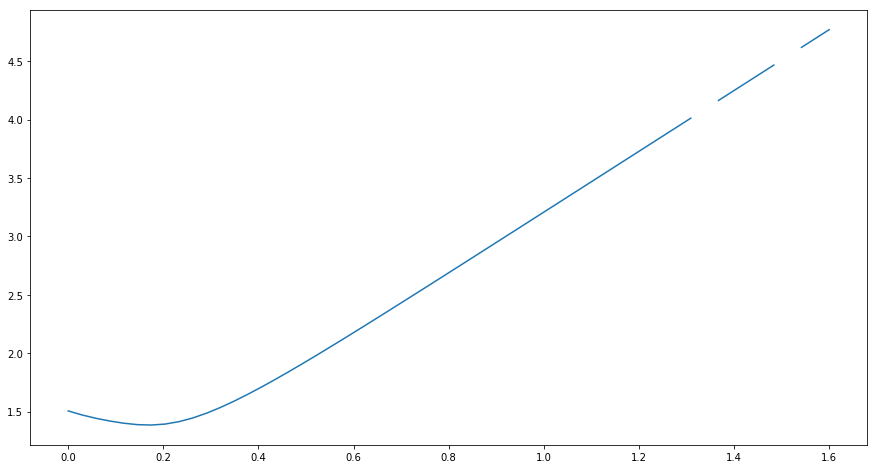

In [22]:
B = np.linspace(0,1.6,56)
A = np.array([])
for i in B:
    Z = TRG_3_rank(K=i, beta=2, D=2, Dcut=6, no_iter=3)
    A = np.append(A,Z)

plt.figure(figsize=(15,8))
plt.plot(B,np.log10(-A))